In [47]:
import pandas as pd
import seaborn as sns

filename = '../data/test/main_part_pilot_2021-11-19.csv'

In [34]:
df = pd.read_csv(filename)

max_player = 4

# where = (
#     (df['player.id_in_group'] >= 2) & 
#     (df['player.id_in_group'] <= max_player + 1)
# )

where = (
    ~df['player.contribution'].isnull()
)

df = df[where]


def get_punishment(row):
    member_idx = row['player.role'][-1]
    return row[f"group.punishment{member_idx}"]

columns = ['session.code', 'subsession.round_number', 'participant.code','player.contribution', 'player.no_input', 'player.punishment', 'group.no_input_manager', 'group.total_contribution', 'group.common_good', 'group.total_punishment']

df['player.punishment'] = df.apply(get_punishment, axis=1)
df = df[columns]


In [35]:
df.head()

,session.code,subsession.round_number,participant.code,player.contribution,player.no_input,player.punishment,group.no_input_manager,group.total_contribution,group.common_good,group.total_punishment
1,0stidp2u,1,lm881p12,20.0,0,0.0,0,55.0,72.0,10.0
2,0stidp2u,1,39zam1aq,15.0,0,0.0,0,55.0,72.0,10.0
3,0stidp2u,1,gto41t7c,15.0,0,0.0,0,55.0,72.0,10.0
4,0stidp2u,1,vroazbin,5.0,0,10.0,0,55.0,72.0,10.0
11,0stidp2u,2,lm881p12,0.0,1,0.0,1,0.0,0.0,0.0


In [36]:
groupby = ['session.code', 'subsession.round_number']

# check total_contribution


check = df.groupby(groupby)['group.total_contribution'].first() == df.groupby(groupby)['player.contribution'].sum()

df['player.contribution.sum'] = df.groupby(groupby)['player.contribution'].transform('sum')

df.set_index(groupby)[~check]


/tmp/ipykernel_25096/1707050216.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.set_index(groupby)[~check]


,,participant.code,player.contribution,player.no_input,player.punishment,group.no_input_manager,group.total_contribution,group.common_good,group.total_punishment,player.contribution.sum
session.code,subsession.round_number,,,,,,,,,
0stidp2u,25,lm881p12,0.0,1,0.0,0,NaN,NaN,NaN,0.0
37ol9gd4,24,wd59m7cg,0.0,1,0.0,0,NaN,NaN,NaN,0.0


<AxesSubplot:xlabel='player.punishment', ylabel='player.contribution'>

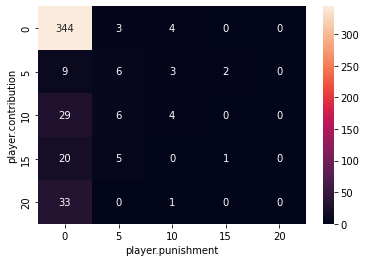

In [52]:
pt = df.pivot_table(index='player.contribution', columns='player.punishment', values='participant.code', aggfunc='count')
pt = pt.reindex(columns=range(0,25,5), index=range(0,25,5)).fillna(0).astype(int)
sns.heatmap(pt, annot=True, fmt='d')